<a href="https://colab.research.google.com/github/BartoszJanJerzy/M-L-Bootcamp-cz.1/blob/master/17_walidacja_krzy%C5%BCowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)

#Generowanie danych

In [34]:
raw_data = make_moons(n_samples=700, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

df = pd.DataFrame(data=np.c_[data,target], columns=['x1','x2','target'])
df.head()

,x1,x2,target
0,-0.159950,1.036386,0.0
1,1.131141,-0.587636,1.0
2,0.169666,0.094209,1.0
3,0.517728,0.815187,0.0
4,-0.680021,0.155635,0.0


In [35]:
fig = px.scatter(df, x='x1', y='x2', color='target', width=700, height=400)
fig

#Podizał na zbiór treningowy i testowy

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [41]:
import plotly.graph_objects as go

fig = go.Figure([
                 go.Scatter(x=X_train[:,0],
                            y=X_train[:,1],
                            mode='markers',
                            name='Train',
                            marker=dict(
                                color=y_train,
                                symbol='cross',
                                size=7,
                                colorscale='VIRIDIS',
                                line=dict(width=1, color='black')
                                # showscale=True
                            )),
                 go.Scatter(x=X_test[:,0],
                            y=X_test[:,1],
                            mode='markers',
                            name='Test',
                            marker=dict(
                                color=y_test,
                                symbol='circle',
                                # colorscale='PURPOR',
                                line=dict(width=1, color='black')

                            ))
], layout=go.Layout(width=1500, height=800))
fig.show()

#Budowa modelu

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



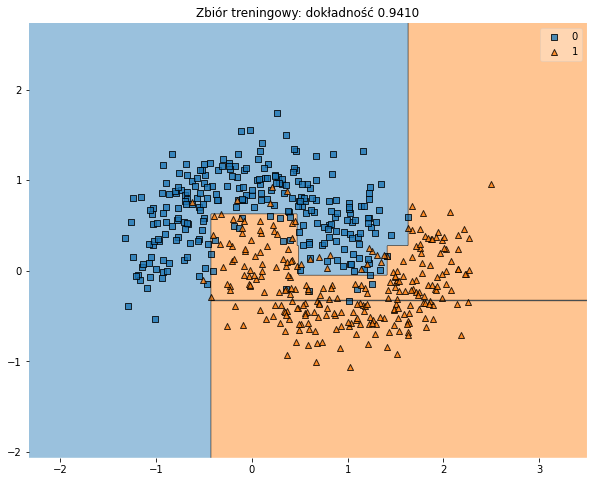

In [42]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

cls = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
cls.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, cls)
plt.title(f'Zbiór treningowy: dokładność {cls.score(X_train, y_train):.4f}')
plt.show()

#Walidacja krzyżowa

In [43]:
from sklearn.model_selection import cross_val_score

cls = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator=cls, X=X_train, y=y_train, cv=10)
scores

array([0.86792453, 0.88679245, 0.94339623, 0.9245283 , 0.98113208,
       0.92307692, 0.94230769, 0.96153846, 0.88461538, 0.88461538])

In [47]:
# uśredniona precyzja modelu na zbiorach treningowych
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.9200 (+/- 0.0359)


Wizualizacja walidacji

In [48]:
scores_df = pd.DataFrame(scores, columns=['accuracy'])
scores_df

,accuracy
0,0.867925
1,0.886792
2,0.943396
3,0.924528
4,0.981132
5,0.923077
6,0.942308
7,0.961538
8,0.884615
9,0.884615


In [57]:
px.bar(scores_df, y='accuracy', color='accuracy', width=700, height=400,
       title=f'Walidacja krzyżowa (10 podziałów) | Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})',
       range_color=[scores_df.min()[0] - 0.01, 1.0])